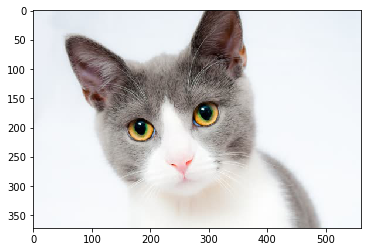

In [3]:
import torch
import math
import torchvision       as tv
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

cat_convolve = Image.open('./Документы/Нейронки/дз2/imgs/cat_convolve.jpg')
plt.imshow(cat_convolve)

In [4]:
cat_tensor = tv.transforms.ToTensor()(cat_convolve)
print (cat_tensor.size())

torch.Size([3, 372, 560])


In [5]:
filter_kernel = torch.FloatTensor(3, 3, 3).fill_(-1)
filter_kernel[:, 1, 1] = 8
print(filter_kernel.size())

torch.Size([3, 3, 3])


# Моя свертка


In [15]:
def my_conv2d(tensor, kernel, stride = 1, padding = 0):
    if type(stride) == int:
        stride = (stride, stride)
    stride_x = stride[0]
    stride_y = stride[1]
        
    res_size = [0, 0]
    for i in range(1, 3):
        res_size[i - 1] = (tensor.shape[i] - kernel.shape[i] + padding * 2) // stride[i-1] + 1
    res_size = torch.Size(res_size)
    
    res = torch.FloatTensor(res_size)
    for x in range(res_size[0]):
        for y in range(res_size[1]):
            x1 = x * stride_x - padding
            y1 = y * stride_y - padding
            x2 = x * stride_x - padding + kernel.shape[1]
            y2 = y * stride_y - padding + kernel.shape[2]
            ker_x1 = 0
            ker_y1 = 0
            ker_x2 = kernel.shape[1]
            ker_y2 = kernel.shape[2]
            
            if (x1 > 0):
                x3 = 0
            else: 
                x3 = 0 - x1
                
            if (y1 > 0):
                y3 = 0  
            else: 
                y3 = 0 - y1
            if (x2 < tensor.shape[1]):
                x4 = kernel.shape[1] 
            else: 
                x4 = kernel.shape[1] - x2 + tensor.shape[1]
                
            if (y2 < tensor.shape[2]):
                y4 = kernel.shape[2]  
            else: 
                y4 = kernel.shape[2] - y2 + tensor.shape[2]
            
            x1 = max(0, x1) 
            y1 = max(0, y1)
            x2 = min(x2, tensor.shape[1]) 
            y2 = min(y2, tensor.shape[2])
            
            res[x, y] = torch.sum(tensor[:, x1:x2, y1:y2] * kernel[:, x3:x4, y3:y4])
        
    return res
    

## Делаем свертку картинки ядром

torch.Size([370, 558])


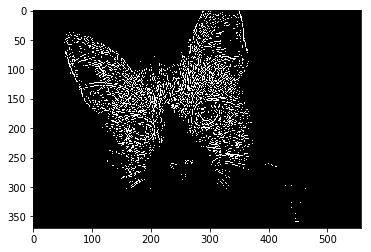

In [16]:
o_image = my_conv2d(cat_tensor, filter_kernel)
o_image[o_image >= 0.5] = 1  
o_image[o_image < 0.5] = 0
print(o_image.size())
plt.imshow(o_image.numpy(), cmap='gray')

## Что будет с картинкой, если мы возьмем ядро  $ \begin{bmatrix}
    1 & 1 \\
    1 & 1
\end{bmatrix}$ и пройдем картинку конволюцией с шагом(stride)=2?


torch.Size([186, 280])


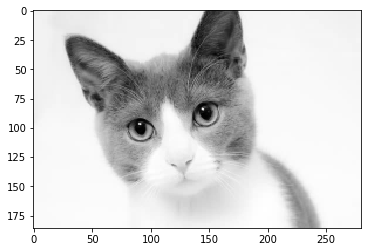

In [17]:
filter_kernelx2 = torch.FloatTensor(3,2,2).fill_(1)
o_image = my_conv2d(cat_tensor, filter_kernelx2, stride=(2,2))
o_image /= 4 # усредняем
print(o_image.size())
plt.imshow(o_image.numpy(), cmap='gray')

# Гаусово распределение

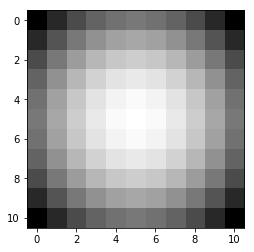

In [18]:
import scipy.ndimage as ndi
import numpy as np
sigma = 10    # параметр распределение
patern_size = 101 # максимальный размер ядра свертки
kernel_size = 10  # реальный размер свертки
x = np.zeros((patern_size, patern_size))
x [patern_size//2, patern_size//2] = 1

# делаем ядро с гаусовым распределением
gause_kernel = ndi.filters.gaussian_filter(x, sigma=sigma)
# вырезаем из центра наш кернел
gause_kernel = gause_kernel[(patern_size//2-(kernel_size//2)):(patern_size//2+(kernel_size//2))+1, \
                (patern_size//2-(kernel_size//2)):(patern_size//2+(kernel_size//2))+1]
# вот он
plt.imshow(gause_kernel, interpolation='none', cmap=plt.get_cmap('gray'))

# Свертка

torch.Size([362, 550])


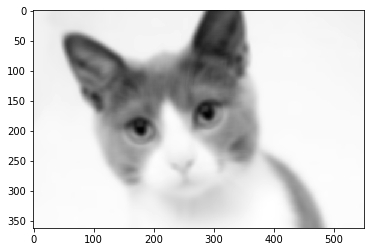

In [19]:
o_image = my_conv2d(cat_tensor, torch.from_numpy(gause_kernel).float().unsqueeze(0))
print(o_image.size())
plt.imshow(o_image.numpy(), cmap='gray')